In [65]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [66]:
import pandas as pd
import numpy as np


data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()




,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [67]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [69]:
sns.set_style('white')
sns.set_context('talk')
sns.set_palette('dark')

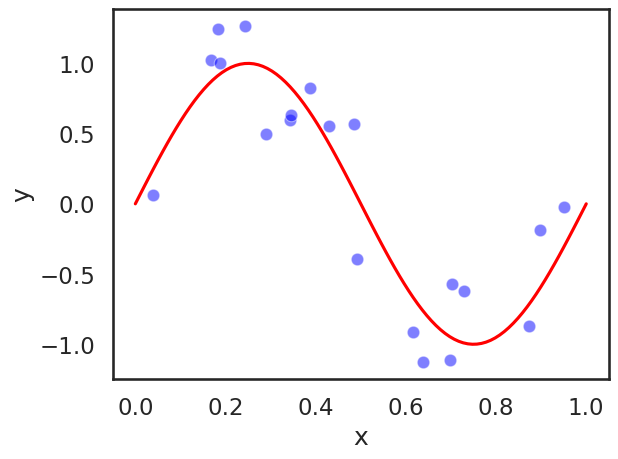

In [70]:
sns.scatterplot(data=data, x='x', y='y', color='blue', alpha=0.5)

sns.lineplot(x=X_real, y=Y_real, color='red')


plt.show()

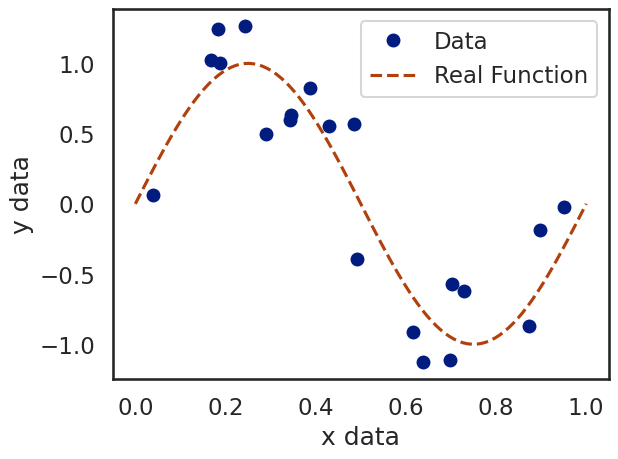

In [71]:
ax = data.set_index('x')['y'].plot(ls='', marker='o', label='Data')
ax.plot(X_real, Y_real, ls='--', marker='', label='Real Function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data')

plt.show()

In [72]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [73]:
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

X_data = data[['x']]
Y_data = data['y']

X_poly = pf.fit_transform(X_data)
lr.fit(X_poly, Y_data)

Y_pred = lr.predict(X_poly)

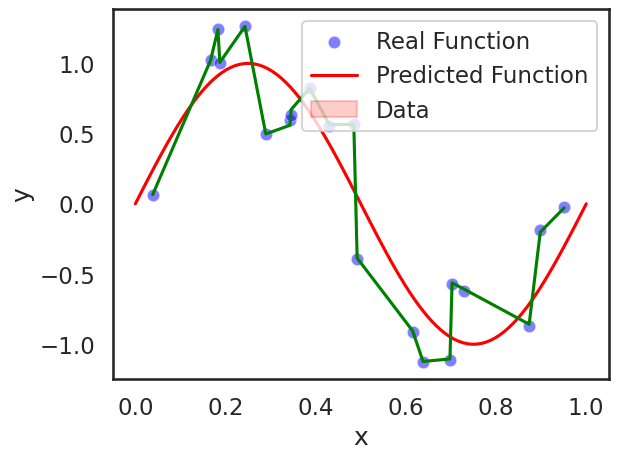

In [74]:
sns.scatterplot(data=data, x=X_data['x'], y=Y_data, color='blue', alpha=0.5)
sns.lineplot(x=X_real, y=Y_real, color='red', legend=True)
sns.lineplot(x=X_data['x'], y=Y_pred, color='green')
plt.legend(['Real Function', 'Predicted Function', 'Data'])
plt.show()

In [75]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.linear_model import Ridge, Lasso

In [76]:
rr = Ridge(alpha=0.001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

lassor = Lasso(alpha=0.0001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

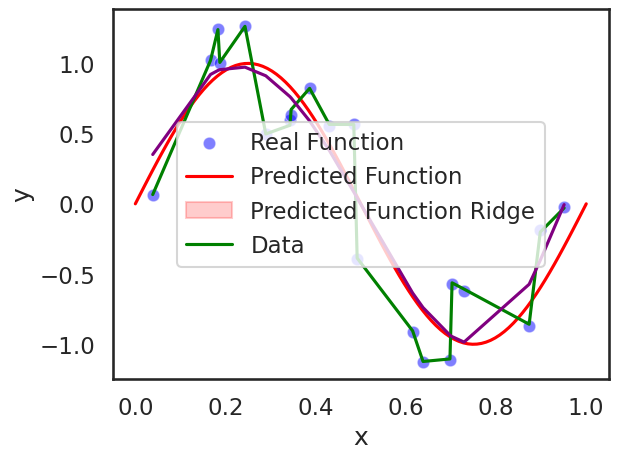

In [77]:
sns.scatterplot(data=data, x=X_data['x'], y=Y_data, color='blue', alpha=0.5)
sns.lineplot(x=X_real, y=Y_real, color='red', legend=True)
sns.lineplot(x=X_data['x'], y=Y_pred, color='green', legend=True)
sns.lineplot(x=X_data['x'], y=Y_pred_lr, color='purple', legend=True)
plt.legend(['Real Function', 'Predicted Function', 'Predicted Function Ridge', 'Data'])
plt.show()

In [78]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.746948e+13,2.169397,2.167284
std,6.009552e+13,2.900278,4.706731
min,1.614526e+07,0.000000,0.000000
25%,2.357119e+12,0.467578,0.000000
50%,3.596528e+13,1.017272,0.252181
75%,1.062887e+14,2.883507,1.641353
max,1.642484e+14,12.429635,20.176708


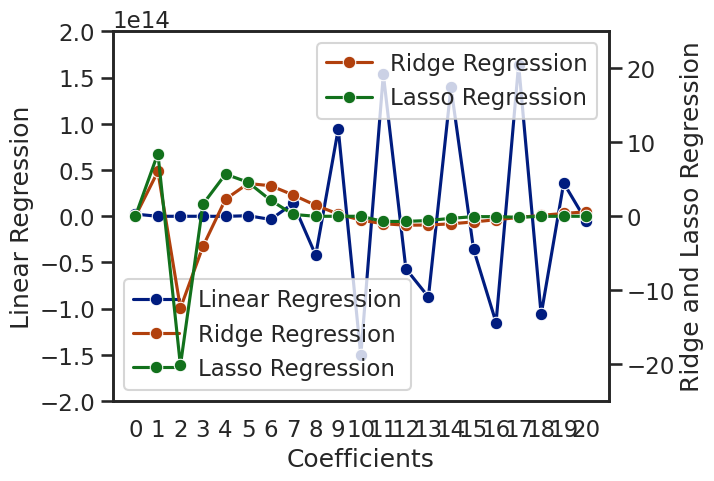

In [79]:
# y colors contiene una paleta de colores.

# Obtén la paleta de colores de Seaborn
colors = sns.color_palette()

# Configura los ejes duales
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  # Segundo eje Y

# Traza los coeficientes de la regresión lineal
sns.lineplot(x=range(len(lr.coef_.ravel())), 
             y=lr.coef_.ravel(), 
             ax=ax1, color=colors[0], marker='o', label='Linear Regression')

# Traza los coeficientes de Ridge en el segundo eje
sns.lineplot(x=range(len(rr.coef_.ravel())), 
             y=rr.coef_.ravel(), 
             ax=ax2, color=colors[1], marker='o', label='Ridge Regression')

# Traza los coeficientes de Lasso en el segundo eje
sns.lineplot(x=range(len(lassor.coef_.ravel())), 
             y=lassor.coef_.ravel(), 
             ax=ax2, color=colors[2], marker='o', label='Lasso Regression')

# Personaliza los límites de los ejes
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combina las leyendas de ambos ejes
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

# Etiquetas y títulos
ax1.set(xlabel='Coefficients', ylabel='Linear Regression')
ax2.set(ylabel='Ridge and Lasso Regression')

# Coloca las etiquetas de los coeficientes
ax1.set_xticks(range(len(lr.coef_)))

plt.show()


In [80]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,NaN,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,NaN,2,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,NaN,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [81]:
data = pd.get_dummies(data, drop_first=True)
data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'Street_Pave', 'Utilities_NoSeWa'],
      dtype='object', length=241)

In [82]:
from sklearn.model_selection import train_test_split


In [83]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

In [84]:
mask = data.dtypes == float
float_cols = data.columns[mask]
float_cols

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'GarageYrBlt', 'GrLivArea',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal',
       'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'WoodDeckSF',
       'SalePrice'],
      dtype='object')

In [85]:
skew_limit = 0.75

skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


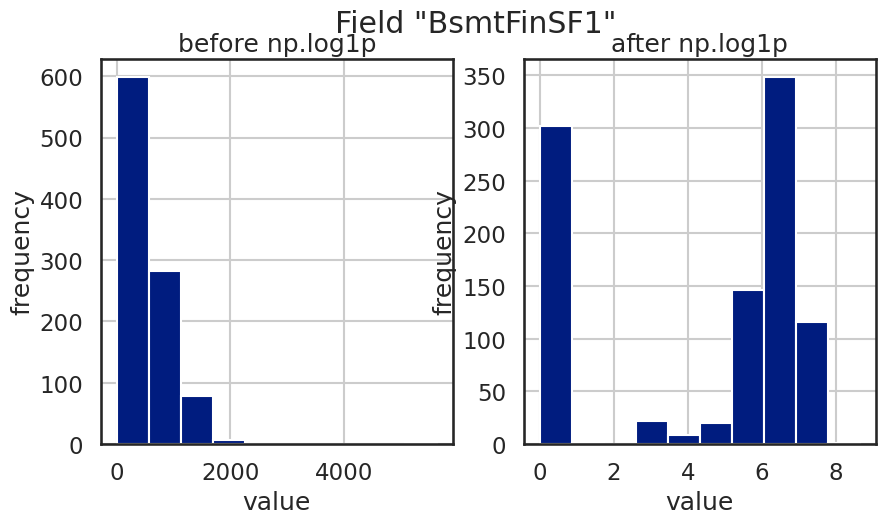

In [86]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
plt.show()

In [87]:
pd.options.mode.chained_assignment = None  # default='warn'

for col in skew_cols.index.tolist():
    if col == 'SalePrice':
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)

In [88]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols]
y_train = train['SalePrice']

X_test = test[feature_cols]
y_test = test['SalePrice']

In [89]:
from sklearn.metrics import mean_squared_error


In [90]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [91]:
from sklearn.linear_model import LinearRegression


In [92]:
linearRegression = LinearRegression().fit(X_train, y_train)

linearRegression_rmse = rmse(y_test, linearRegression.predict(X_test))

print("Linear Regression RMSE: {:.4f}".format(linearRegression_rmse))

Linear Regression RMSE: 42033.4922


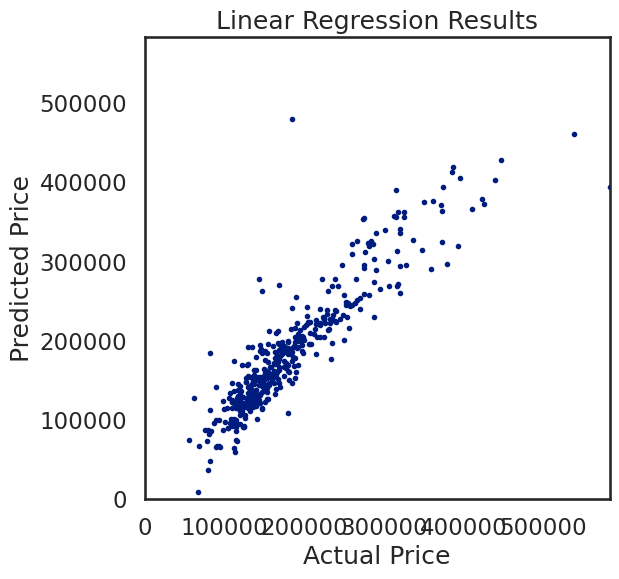

In [93]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results')

plt.show()

In [95]:
from sklearn.linear_model import RidgeCV


In [97]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas,
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))

print("Ridge alpha: {}".format(ridgeCV.alpha_))

print("Ridge Regression RMSE: {:.4f}".format(ridgeCV_rmse))

Ridge alpha: 10.0
Ridge Regression RMSE: 32022.0315


In [101]:
from sklearn.linear_model import LassoCV

alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005])

lassoCV = LassoCV(alphas=alphas2,
                    max_iter=int(5e4),
                    cv=3).fit(X_train, y_train)

lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))

print("Lasso alpha: {}".format(lassoCV.alpha_))

print("Lasso Regression RMSE: {:.4f}".format(lassoCV_rmse))


Lasso alpha: 0.0005
Lasso Regression RMSE: 46069.6386


In [104]:

print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 240 coefficients, 230 are non-zero with Lasso.


In [105]:
from sklearn.linear_model import ElasticNetCV

l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=int(1e4)).fit(X_train, y_train)
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.0005 0.1 36040.65858463382


In [106]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0:'RMSE'}, inplace=True)
rmse_df

,RMSE
Linear,42033.492153
Ridge,32022.031470
Lasso,46069.638570
ElasticNet,36040.658585


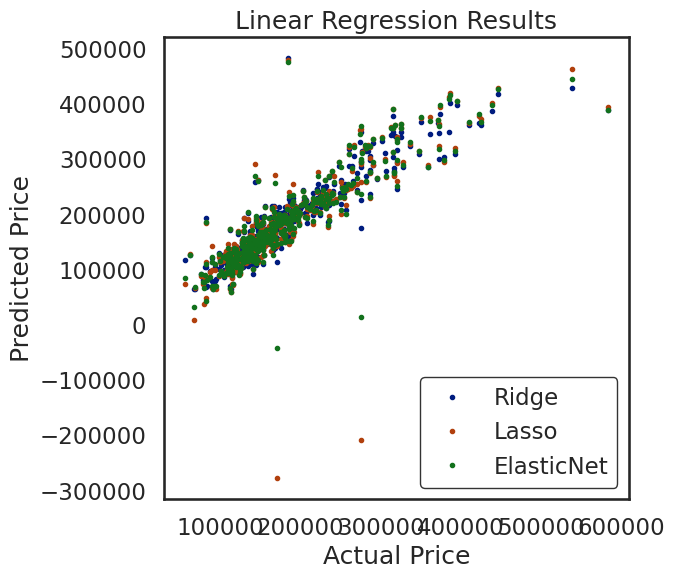

In [107]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results')

plt.show()

In [108]:
from sklearn.linear_model import SGDRegressor


In [109]:
model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
              'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
                'alpha': ridgeCV.alpha_},
    'ElasticNet': {'penalty': 'elasticnet',
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

In [110]:
new_rmses = {}

for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD
Linear,42033.492153,7.537961e+15
Ridge,32022.031470,1.262723e+16
Lasso,46069.638570,2.617444e+15
ElasticNet,36040.658585,1.910674e+15


In [111]:
model_parameters_dict = {
    'Linear': {'penalty': None},
    'Lasso': {'penalty': 'l2',
           'alpha': lassoCV.alpha_},
    'Ridge': {'penalty': 'l1',
           'alpha': ridgeCV_rmse},
    'ElasticNet': {'penalty': 'elasticnet', 
                   'alpha': elasticNetCV.alpha_,
                   'l1_ratio': elasticNetCV.l1_ratio_}
}

In [113]:
new_rmses = {}
for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(eta0 = 1e-7, **parameters)
    SGD.fit(X_train, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test))

rmse_df['RMSE-SGD-learningrate'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate
Linear,42033.492153,7.537961e+15,75933.032898
Ridge,32022.031470,1.262723e+16,75436.217898
Lasso,46069.638570,2.617444e+15,75690.649602
ElasticNet,36040.658585,1.910674e+15,73830.177236


In [114]:
from sklearn.preprocessing import MinMaxScaler


In [115]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

new_rmses = {}

for modellabel, parameters in model_parameters_dict.items():
    SGD = SGDRegressor(**parameters)
    SGD.fit(X_train_scaled, y_train)
    new_rmses[modellabel] = rmse(y_test, SGD.predict(X_test_scaled))

rmse_df['RMSE-SGD-scaled'] = pd.Series(new_rmses)
rmse_df

,RMSE,RMSE-SGD,RMSE-SGD-learningrate,RMSE-SGD-scaled
Linear,42033.492153,7.537961e+15,75933.032898,32451.455212
Ridge,32022.031470,1.262723e+16,75436.217898,77767.109900
Lasso,46069.638570,2.617444e+15,75690.649602,32538.625771
ElasticNet,36040.658585,1.910674e+15,73830.177236,32148.039498
